<a href="https://colab.research.google.com/github/Timofeychick/CS_SEMINARS/blob/main/PCA_practical_exampleipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import eig
from sklearn.decomposition import PCA

# PCA with Pandas

## Импорт данных

In [ ]:
df = pd.read_excel('/content/data.xlsx', index_col=0)

In [ ]:
df.head(5)

,1,2,3,4,5,6
1,129,64,95,17.5,11.2,13.8
2,154,74,76,20.0,14.2,16.5
3,170,87,71,17.9,12.3,15.9
4,188,94,73,19.5,13.3,14.8
5,161,81,55,17.1,12.1,13.0


In [ ]:
df.shape

(43, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 1 to 43
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Длина черпа                    43 non-null     float64
 1   Длина верхней челюсти          43 non-null     float64
 2   Ширина верхней челюсти         43 non-null     float64
 3   Длина верхнего карнивора       43 non-null     float64
 4   Длина первого верхнего моляра  43 non-null     float64
 5   Ширина верхнего моляра         43 non-null     float64
dtypes: float64(6)
memory usage: 2.4 KB


In [ ]:
columns = ['Длина черпа', 'Длина верхней челюсти', 'Ширина верхней челюсти', 'Длина верхнего карнивора', 'Длина первого верхнего моляра', 'Ширина верхнего моляра']

In [ ]:
df.columns = columns

In [ ]:
df.head()

,Длина черпа,Длина верхней челюсти,Ширина верхней челюсти,Длина верхнего карнивора,Длина первого верхнего моляра,Ширина верхнего моляра
1,129,64,95,17.5,11.2,13.8
2,154,74,76,20.0,14.2,16.5
3,170,87,71,17.9,12.3,15.9
4,188,94,73,19.5,13.3,14.8
5,161,81,55,17.1,12.1,13.0


In [ ]:
np.ones(30)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.zeros(12)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# df['animal'] = np.array([1]*34 + [0]*6)

## Нормировака данных

In [ ]:
df = (df - df.mean()) / df.std(ddof=0)

## Расчет матрицы корреляции

In [ ]:
df.corr().round(2)

,Длина черпа,Длина верхней челюсти,Ширина верхней челюсти,Длина верхнего карнивора,Длина вервого верхнего моляра,Ширина верхнего моляра
Длина черпа,1.00,0.96,0.35,0.61,0.72,0.59
Длина верхней челюсти,0.96,1.00,0.20,0.66,0.74,0.59
Ширина верхней челюсти,0.35,0.20,1.00,0.37,0.35,0.35
Длина верхнего карнивора,0.61,0.66,0.37,1.00,0.89,0.76
Длина вервого верхнего моляра,0.72,0.74,0.35,0.89,1.00,0.79
Ширина верхнего моляра,0.59,0.59,0.35,0.76,0.79,1.00


In [ ]:
corr = df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,Длина черпа,Длина верхней челюсти,Ширина верхней челюсти,Длина верхнего карнивора,Длина вервого верхнего моляра,Ширина верхнего моляра
Длина черпа,1.000000,0.960000,0.350000,0.610000,0.720000,0.590000
Длина верхней челюсти,0.960000,1.000000,0.200000,0.660000,0.740000,0.590000
Ширина верхней челюсти,0.350000,0.200000,1.000000,0.370000,0.350000,0.350000
Длина верхнего карнивора,0.610000,0.660000,0.370000,1.000000,0.890000,0.760000
Длина вервого верхнего моляра,0.720000,0.740000,0.350000,0.890000,1.000000,0.790000
Ширина верхнего моляра,0.590000,0.590000,0.350000,0.760000,0.790000,1.000000


## Нахождение собственных векторов и собственных значений матрицы корреляций


In [ ]:
cov_matrix = np.cov(df, rowvar=False).round(2)

In [ ]:
cov_matrix

array([[1.02, 0.98, 0.36, 0.63, 0.74, 0.6 ],
       [0.98, 1.02, 0.21, 0.68, 0.75, 0.61],
       [0.36, 0.21, 1.02, 0.38, 0.36, 0.36],
       [0.63, 0.68, 0.38, 1.02, 0.92, 0.78],
       [0.74, 0.75, 0.36, 0.92, 1.02, 0.81],
       [0.6 , 0.61, 0.36, 0.78, 0.81, 1.02]])

In [ ]:
eigenvalues, eigenvectors = eig(cov_matrix)

In [ ]:
eigenvalues = np.round(eigenvalues, 3)

In [ ]:
eigenvalues

array([4.2  , 0.894, 0.652, 0.263, 0.018, 0.093])

In [ ]:
percentage_of_trail = eigenvalues / np.sum(eigenvalues) * 100

In [ ]:
percentage_of_trail

array([68.62745098, 14.60784314, 10.65359477,  4.29738562,  0.29411765,
        1.51960784])

In [ ]:
cum_sum = np.cumsum(sorted(percentage_of_trail, reverse=True))

In [ ]:
cum_sum

array([ 68.62745098,  83.23529412,  93.88888889,  98.18627451,
        99.70588235, 100.        ])

In [ ]:
eigenvectors = np.round(eigenvectors, 2)

In [ ]:
eigenvectors

array([[ 0.43,  0.22, -0.53,  0.1 , -0.68, -0.1 ],
       [ 0.43,  0.37, -0.4 ,  0.02,  0.67,  0.26],
       [ 0.23, -0.89, -0.36, -0.02,  0.13,  0.01],
       [ 0.44, -0.06,  0.39, -0.53, -0.22,  0.57],
       [ 0.46,  0.02,  0.27, -0.31,  0.16, -0.77],
       [ 0.41, -0.09,  0.44,  0.78, -0.01,  0.09]])

## PCA

In [ ]:
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalue = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

In [ ]:
sorted_eigenvectors

array([[ 0.43085705,  0.22087526, -0.53193254,  0.10383305, -0.10496344,
        -0.67884127],
       [ 0.4299952 ,  0.37374412, -0.39962318,  0.01682678,  0.2564171 ,
         0.67058773],
       [ 0.22875656, -0.89442584, -0.3603176 , -0.01559818,  0.01473524,
         0.13184705],
       [ 0.43954294, -0.05957858,  0.39350973, -0.52974896,  0.56615982,
        -0.2173283 ],
       [ 0.46036215,  0.02323794,  0.27394043, -0.3056415 , -0.77087512,
         0.15753779],
       [ 0.41473541, -0.08626848,  0.44455265,  0.7839908 ,  0.09072172,
        -0.00729658]])

In [ ]:
X_pandas = np.dot(df.to_numpy(), sorted_eigenvectors)

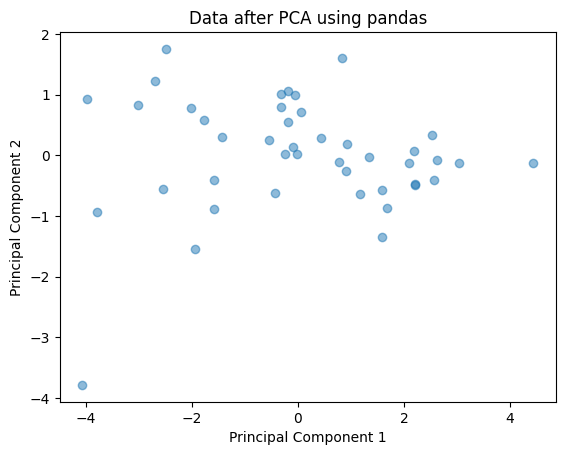

In [ ]:
plt.scatter(X_pandas[:, 0], X_pandas[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA using pandas')
plt.show()

# PCA with Sklearn

## PCA - 3 components

In [ ]:
pca = PCA(n_components=3)

In [ ]:
components = pca.fit_transform(df)

In [ ]:
print(pca.explained_variance_ratio_)

[0.68320148 0.14710126 0.10625599]


In [ ]:
print(pca.singular_values_)

[13.27651998  6.16052958  5.23584227]


## Визуализируем результат

In [ ]:
Xax = components[:,0]
Yax = components[:,1]
Zax = components[:,2]

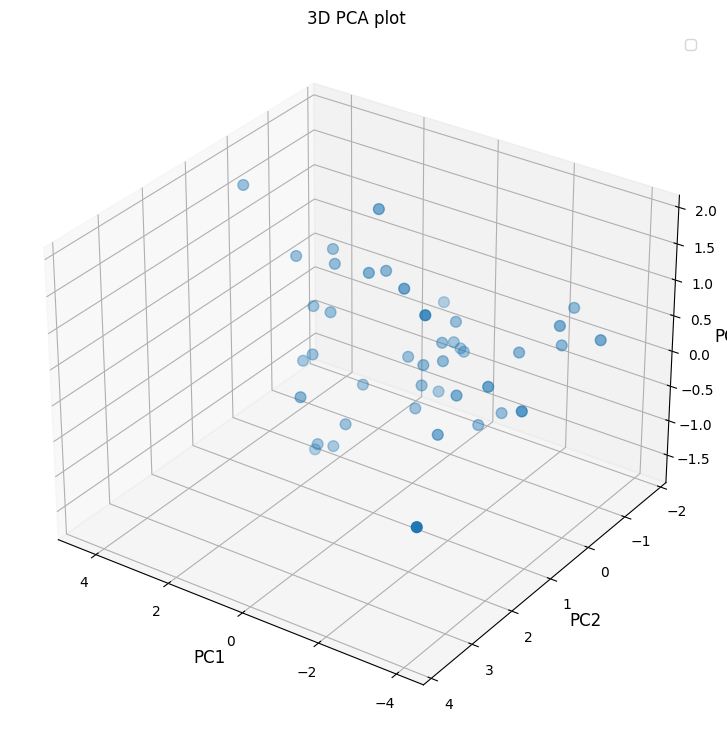

In [ ]:
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xax, Yax, Zax, s=60)

ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

ax.view_init(30, 125)
ax.legend()
plt.title("3D PCA plot")
plt.show()

## PCA - 2 components

In [ ]:
pca = PCA(n_components=2)

In [ ]:
components = pca.fit_transform(df)

In [ ]:
print(pca.explained_variance_ratio_)

[0.68320148 0.14710126]


In [ ]:
print(pca.singular_values_)

[13.27651998  6.16052958]


## Визуализируем результат

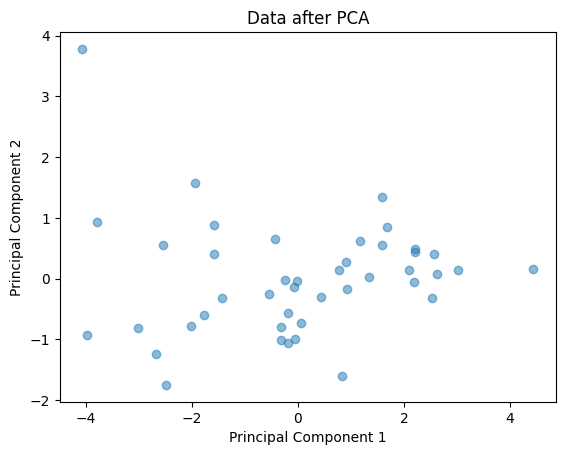

In [ ]:
plt.scatter(components[:, 0], components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')
plt.show()

# PCA witn NumPy

In [ ]:
cov_matrix = np.cov(df, rowvar=False)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [ ]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

In [ ]:
X_numpy = np.dot(df.to_numpy(), sorted_eigenvectors)

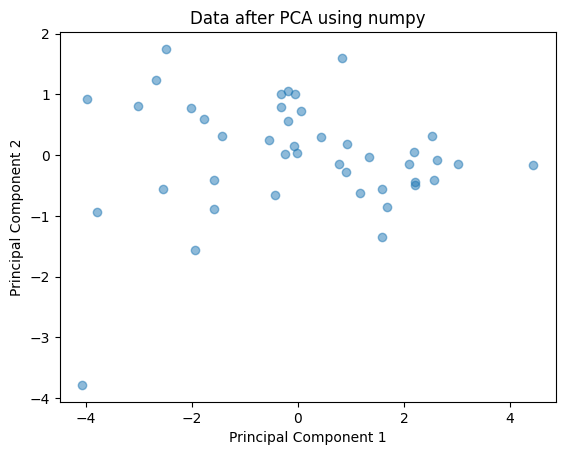

In [ ]:
plt.scatter(X_numpy[:, 0], X_numpy[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA using numpy')
plt.show()